In [1]:
import pandas as pd
import io
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import os

In [2]:
# get stock information to determine which sector it belongs to
aapl = yf.Ticker("AAPL")
aapl.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 164000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. Further, it provides AppleCare support and cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand rad

In [3]:
# Technology 10
technology_tickers = ["AAPL","MSFT","NVDA","TSM","ORCL","ASML","AVGO","CSCO","ACN","IBM"]
technology_dict = {}
for t in technology_tickers:
    technology_dict[t] = yf.download(tickers=t, period='5y')
    technology_dict[t].drop(columns=["Adj Close"], inplace = True)
    technology_dict[t].insert(0, "Company",t)
    technology_dict[t].insert(1, "Sector", "Technology")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
technology_dict["AAPL"]

,Company,Sector,Open,High,Low,Close,Volume
Date,,,,,,,
2017-11-02,AAPL,Technology,41.650002,42.125000,41.320000,42.027500,165573600
2017-11-03,AAPL,Technology,43.500000,43.564999,42.779999,43.125000,237594400
2017-11-06,AAPL,Technology,43.092499,43.747501,42.930000,43.562500,140105200
2017-11-07,AAPL,Technology,43.477501,43.812500,43.400002,43.702499,97446000
2017-11-08,AAPL,Technology,43.665001,44.060001,43.582500,44.060001,97638000
...,...,...,...,...,...,...,...
2022-10-26,AAPL,Technology,150.960007,151.990005,148.039993,149.350006,88194300
2022-10-27,AAPL,Technology,148.070007,149.050003,144.130005,144.800003,109180200
2022-10-28,AAPL,Technology,148.199997,157.500000,147.820007,155.740005,164762400


In [5]:
# Healthcare 10
healthcare_tickers = ["UNH","JNJ","LLY","PFE","ABBV","MRK","NVO","TMO","DHR","AZN"]
healthcare_dict = {}
for t in healthcare_tickers:
    healthcare_dict[t] = yf.download(tickers=t, period='5y')
    healthcare_dict[t].drop(columns=["Adj Close"], inplace = True)
    healthcare_dict[t].insert(0, "Company",t)
    healthcare_dict[t].insert(1, "Sector", "Healthcare")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
healthcare_dict["UNH"]

,Company,Sector,Open,High,Low,Close,Volume
Date,,,,,,,
2017-11-02,UNH,Healthcare,210.110001,211.490005,209.009995,211.100006,2825900
2017-11-03,UNH,Healthcare,210.720001,213.830002,210.100006,212.869995,2196900
2017-11-06,UNH,Healthcare,211.910004,213.929993,211.800003,212.119995,2293700
2017-11-07,UNH,Healthcare,212.740005,213.539993,210.889999,212.699997,1845800
2017-11-08,UNH,Healthcare,212.080002,212.929993,210.699997,210.770004,2261100
...,...,...,...,...,...,...,...
2022-10-26,UNH,Healthcare,541.380005,547.640015,540.210022,543.169983,2863500
2022-10-27,UNH,Healthcare,546.520020,546.520020,539.760010,541.799988,2212100
2022-10-28,UNH,Healthcare,544.969971,553.000000,543.690002,551.239990,2761900


In [7]:
# Consumer Cyclical 12
cyclical_tickers = ["AMZN","TSLA","HD","MCD","TM","BABA","NKE","LOW","SBUX","ABNB","LULU","EBAY"]
cyclical_dict = {}
for t in cyclical_tickers:
    cyclical_dict[t] = yf.download(tickers=t, period='5y')
    cyclical_dict[t].drop(columns=["Adj Close"], inplace = True)
    cyclical_dict[t].insert(0, "Company",t)
    cyclical_dict[t].insert(1, "Sector", "Consumer Cyclical")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
cyclical_dict["AMZN"]

,Company,Sector,Open,High,Low,Close,Volume
Date,,,,,,,
2017-11-02,AMZN,Consumer Cyclical,54.890499,55.097000,54.343498,54.710999,73698000
2017-11-03,AMZN,Consumer Cyclical,54.557499,55.633999,54.425999,55.580002,75030000
2017-11-06,AMZN,Consumer Cyclical,55.457500,56.270500,55.438499,56.033001,67622000
2017-11-07,AMZN,Consumer Cyclical,56.237000,56.529999,55.875000,56.158501,53780000
2017-11-08,AMZN,Consumer Cyclical,56.140999,56.777000,55.955502,56.644001,51630000
...,...,...,...,...,...,...,...
2022-10-26,AMZN,Consumer Cyclical,116.000000,119.349998,114.760002,115.660004,68802300
2022-10-27,AMZN,Consumer Cyclical,113.919998,114.120003,109.769997,110.959999,129605400
2022-10-28,AMZN,Consumer Cyclical,97.910004,103.959999,97.660004,103.410004,223133400


In [9]:
# Industrials 2
industrials_tickers = ["RTX","BA"]
industrials_dict = {}
for t in industrials_tickers:
    industrials_dict[t] = yf.download(tickers=t, period='5y')
    industrials_dict[t].drop(columns=["Adj Close"], inplace = True)
    industrials_dict[t].insert(0, "Company",t)
    industrials_dict[t].insert(1, "Sector", "Industrials")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
industrials_dict["RTX"]

,Company,Sector,Open,High,Low,Close,Volume
Date,,,,,,,
2017-11-02,RTX,Industrials,75.575836,76.469475,75.336693,76.438011,3119366
2017-11-03,RTX,Industrials,76.620514,76.620514,75.758339,76.192574,3822657
2017-11-06,RTX,Industrials,76.312149,76.438011,75.752045,75.764633,3838388
2017-11-07,RTX,Industrials,75.940842,76.438011,75.758339,75.991188,2945370
2017-11-08,RTX,Industrials,75.846443,76.142227,75.525490,75.695404,3195479
...,...,...,...,...,...,...,...
2022-10-26,RTX,Industrials,88.599998,92.199997,88.599998,90.519997,6668600
2022-10-27,RTX,Industrials,90.940002,93.379997,90.910004,91.800003,6420800
2022-10-28,RTX,Industrials,92.500000,95.160004,92.070000,95.080002,6360800


In [11]:
# Financial Services 8
financial_tickers = ["JPM","BAC","GS","MS","V","HSBC","C","UBS"]
financial_dict = {}
for t in financial_tickers:
    financial_dict[t] = yf.download(tickers=t, period='5y')
    financial_dict[t].drop(columns=["Adj Close"], inplace = True)
    financial_dict[t].insert(0, "Company",t)
    financial_dict[t].insert(1, "Sector", "Financial Services")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
financial_dict["C"]

,Company,Sector,Open,High,Low,Close,Volume
Date,,,,,,,
2017-11-02,C,Financial Services,73.949997,74.849998,73.330002,74.739998,12997500
2017-11-03,C,Financial Services,74.220001,74.389999,73.839996,74.050003,10692600
2017-11-06,C,Financial Services,73.589996,74.029999,73.169998,73.800003,12636600
2017-11-07,C,Financial Services,73.779999,74.000000,72.320000,72.709999,17255700
2017-11-08,C,Financial Services,72.389999,72.570000,71.519997,72.339996,18710600
...,...,...,...,...,...,...,...
2022-10-26,C,Financial Services,45.500000,45.980000,45.220001,45.410000,16516200
2022-10-27,C,Financial Services,45.869999,46.139999,45.349998,45.439999,15687900
2022-10-28,C,Financial Services,45.560001,46.279999,45.029999,46.130001,13457900


In [13]:
# Communication Services 5
communication_tickers = ["GOOG","META","NFLX","BIDU","DIS"]
communication_dict = {}
for t in communication_tickers:
    communication_dict[t] = yf.download(tickers=t, period='5y')
    communication_dict[t].drop(columns=["Adj Close"], inplace = True)
    communication_dict[t].insert(0, "Company",t)
    communication_dict[t].insert(1, "Sector", "Communication Services")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
communication_dict["GOOG"]

,Company,Sector,Open,High,Low,Close,Volume
Date,,,,,,,
2017-11-02,GOOG,Communication Services,51.088001,51.404499,50.650501,51.278999,20980000
2017-11-03,GOOG,Communication Services,51.105499,51.632500,51.015499,51.624001,21528000
2017-11-06,GOOG,Communication Services,51.449501,51.743500,51.250000,51.294998,22504000
2017-11-07,GOOG,Communication Services,51.363499,51.698502,51.256500,51.666500,22246000
2017-11-08,GOOG,Communication Services,51.526001,52.176102,51.422501,51.992500,21774000
...,...,...,...,...,...,...,...
2022-10-26,GOOG,Communication Services,96.760002,98.540001,94.570000,94.820000,71504300
2022-10-27,GOOG,Communication Services,94.309998,95.169998,91.900002,92.599998,54036500
2022-10-28,GOOG,Communication Services,92.529999,96.860001,92.322998,96.580002,35696900


In [15]:
# Energy 4
energy_tickers = ["XOM","CVX","SHEL","COP"]
energy_dict = {}
for t in energy_tickers:
    energy_dict[t] = yf.download(tickers=t, period='5y')
    energy_dict[t].drop(columns=["Adj Close"], inplace = True)
    energy_dict[t].insert(0, "Company",t)
    energy_dict[t].insert(1, "Sector", "Energy")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
energy_dict["SHEL"]

,Company,Sector,Open,High,Low,Close,Volume
Date,,,,,,,
2017-11-02,SHEL,Energy,62.930000,64.239998,62.930000,64.220001,8200074
2017-11-03,SHEL,Energy,64.150002,64.220001,63.610001,64.099998,3742853
2017-11-06,SHEL,Energy,64.250000,65.830002,64.220001,65.519997,9346581
2017-11-07,SHEL,Energy,65.320000,65.330002,64.489998,64.540001,8912335
2017-11-08,SHEL,Energy,64.650002,64.831001,64.239998,64.349998,5182379
...,...,...,...,...,...,...,...
2022-10-26,SHEL,Energy,52.590000,53.740002,52.590000,53.310001,5667610
2022-10-27,SHEL,Energy,55.869999,56.730701,55.849998,56.009998,7316421
2022-10-28,SHEL,Energy,56.480000,56.680000,55.830002,56.180000,5940751


Please enter the sector:technology


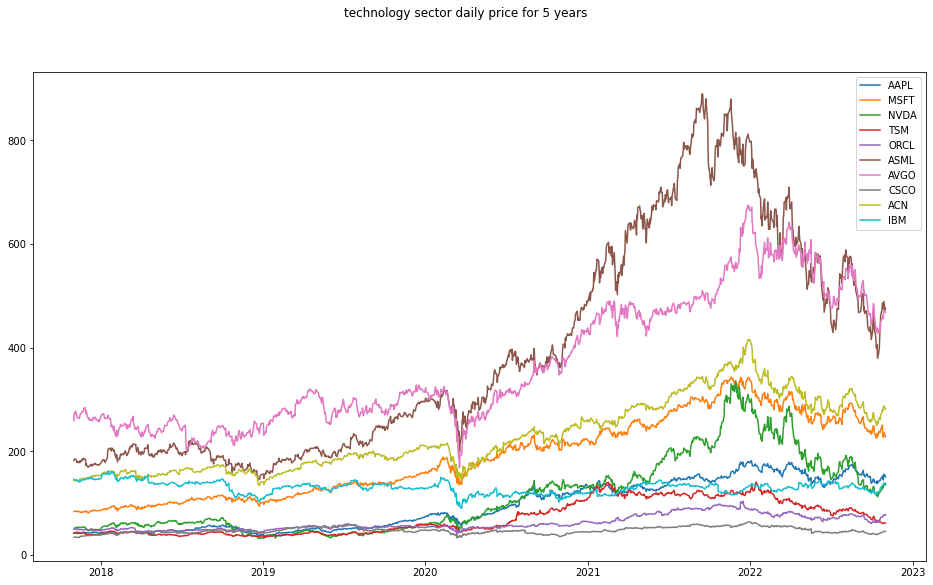

In [17]:
# the trend of stock prices in different sectors
sector = input("Please enter the sector:")
sector_dict = {"technology":technology_dict, "healthcare":healthcare_dict, "cyclical":cyclical_dict,"industrials":industrials_dict, "financial":financial_dict, "communication": communication_dict, "energy":energy_dict}

plt.rcParams["figure.figsize"] = [16,9]

def plot_graph(df_dict):
    for key, value in df_dict.items():
        plt.plot(value.index, value['Close'])
        
    plt.legend(df_dict.keys())  
    plt.suptitle(f"{sector} sector daily price for 5 years")
    plt.show()
if sector not in sector_dict:
    print("Please enter 'technology', 'healthcare', 'cyclical', 'industrials', 'financial', 'communication', 'energy'")
else:
    plot_graph(sector_dict[sector])

In [18]:
data = pd.concat(list(technology_dict.values())
          +list(healthcare_dict.values())
          +list(cyclical_dict.values())
          +list(industrials_dict.values())
          +list(financial_dict.values())
          +list(communication_dict.values())
          +list(energy_dict.values()))

In [19]:
data

,Company,Sector,Open,High,Low,Close,Volume
Date,,,,,,,
2017-11-02,AAPL,Technology,41.650002,42.125000,41.320000,42.027500,165573600
2017-11-03,AAPL,Technology,43.500000,43.564999,42.779999,43.125000,237594400
2017-11-06,AAPL,Technology,43.092499,43.747501,42.930000,43.562500,140105200
2017-11-07,AAPL,Technology,43.477501,43.812500,43.400002,43.702499,97446000
2017-11-08,AAPL,Technology,43.665001,44.060001,43.582500,44.060001,97638000
...,...,...,...,...,...,...,...
2022-10-26,COP,Energy,124.720001,128.179993,124.580002,126.570000,8139100
2022-10-27,COP,Energy,127.699997,129.449997,126.239998,126.639999,8948500
2022-10-28,COP,Energy,128.500000,128.990005,124.010002,127.169998,7293200


In [20]:
data.isnull().sum()

Company    0
Sector     0
Open       0
High       0
Low        0
Close      0
Volume     0
dtype: int64

In [21]:
data.to_csv('data.csv')